#Import Library
Proses untuk menginisialisasi library yang akan dibutuhkan untuk proses mengolah data untuk Predictive Analysis

Mengimpor library google drive untuk mengambil dataset yang disimpan dalam Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengimpor library yang dibutuhkan untuk proses predictive analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

#Data Loading
Tahap untuk memuat dataset ke dalam variabel dalam python

Menuliskan url atau direktori dari tempat dataset disimpan

In [ ]:
url = "/content/drive/MyDrive/File Ozan/Repo Machine Learning/Bank Customer Churn Prediction.csv"

Memanggil dataset berformat .csv ke dalam variabel dataset menggunakan library pandas

In [ ]:
dataset = pd.read_csv(url)
dataset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#Data Preparation
Tahap untuk mengolah data agar data siap digunakan untuk proses modeling. Tahapan yang dilakukan antara lain
- `Data Info`: Tahap untuk memuat informasi dari dataset
- `Check Missing Value` : Melakukan pengecekan missing value dalam data (bisa NULL atau 0) menyesuaikan analisis masalah
- `Outlier Analysis` : Tahap untuk melakukan analisis & memvisualisasikan persebaran data pada setiap kolom untuk mengetahui outlier = sebuah data atau observasi yang menyimpang secara ekstrim dari rata-rata sekumpulan data yang ada
- `Drop Outlier` : Tahap untuk menangani outlier pada dataset. Disini digunakan metode Inter Quartile Range (IQR)
- `Univariate Analysis` : Pada tahap ini merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah untuk 1 jenis variabel / kolom
- `Multivariate Analysis` : Pada tahap ini merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah untuk 2 atau lebih jenis variabel / kolom
- `Drop Column` : Tahap untuk melakukan penghilangan kolom yang tidak diperlukan sesuai analisis masalah dan tujuan penelitian
- `Encoding Categorical Features` : Tahap untuk memberikan alias dalam bentuk numerik kepada kolom yang bersifat kategorikal
- `PCA Reduction` : Tahap untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n
- `Train Test Split` : Tahap untuk membagi dataset menjadi data train dan data test dalam pembagian yang ditentukan
- `Standarisasi` : Tahap untuk melakukan perubahan skala nilai pada suatu kolom sesuai skala yang diinginkan


###Data Info
Tahap untuk memuat informasi dari dataset

Melihat informasi mengenai dataset antara lain
- Jumlah dan nama kolom
- Jumlah baris dari setiap kolom
- Tipe nullable atau tidak dari tiap kolom
- Tipe data dari tiap kolom

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


`dataset.describe()` Ditujukan untuk mendeskripsikan beberapa parameter untuk seluruh kolom dari dataset. Parameter tersebut antara lain
- Count atau jumlah baris dari setiap kolom
- Mean atau rata-rata dari setiap kolom
- Standar deviasi dari setiap kolom
- Nilai minimum / terkecil dari setiap kolom
- Nilai kuartil pertama atau 25% dari setiap kolom
- Nilai kuartil kedua atau 50% atau median dari setiap kolom
- Nilai kuartil ketiga atau 75% dari setiap kolom
- Nilai maximum / terbesar dari setiap kolom

In [ ]:
dataset.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


`dataset.columns` Ditujukan untuk mejabarkan kolom apa saja yang tersedia pada dataset yang digunakan

In [ ]:
dataset.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

###Check Missing Value
Melakukan pengecekan missing value dalam data (bisa NULL atau 0) menyesuaikan analisis masalah

Tahap untuk melakukan pengecekan NULL pada setiap kolom, didapatkan hasil tidak ada NULL pada setiap kolom

In [ ]:
dataset.isnull().sum()*100/dataset.shape[0]

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

###Outlier Analysis
Tahap untuk melakukan analisis & memvisualisasikan persebaran data pada setiap kolom untuk mengetahui outlier = sebuah data atau observasi yang menyimpang secara ekstrim dari rata-rata sekumpulan data yang ada

Tahap untuk melakukan analisis & memvisualisasikan persebaran data pada setiap kolom. Pada baris kode ini dilakukan penghilangan kolom yang bersifat kategorial yaitu `country` dan `gender`

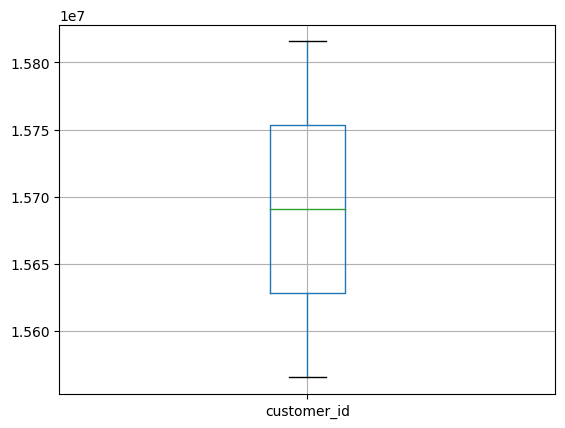

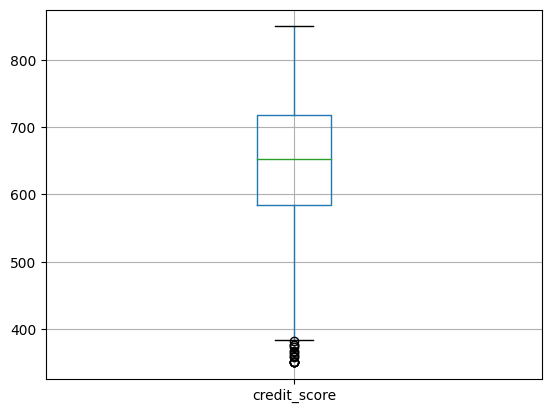

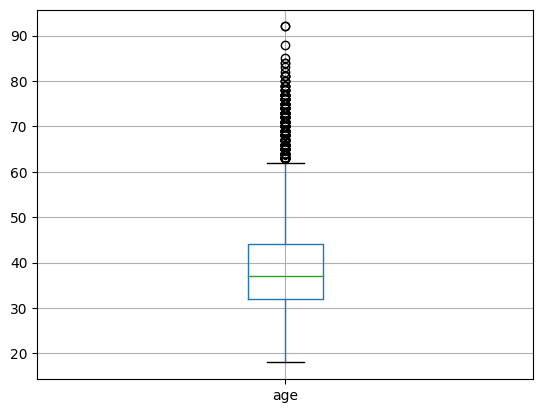

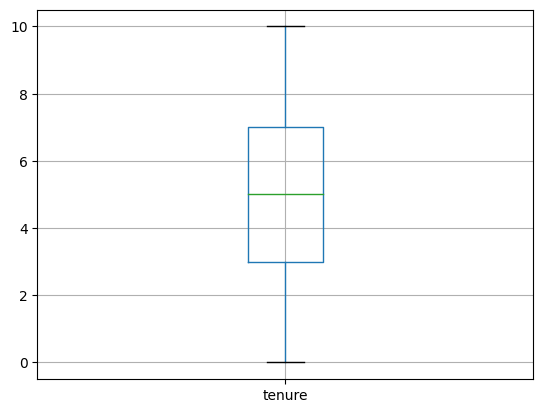

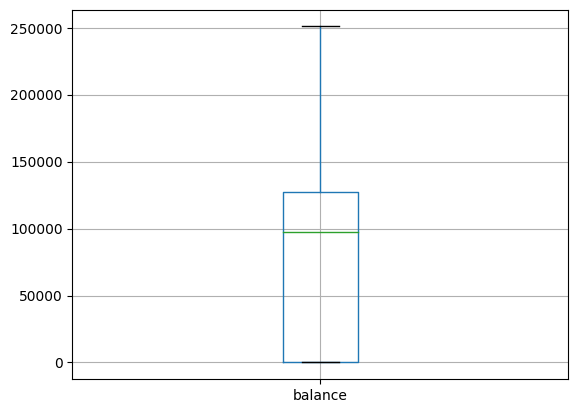

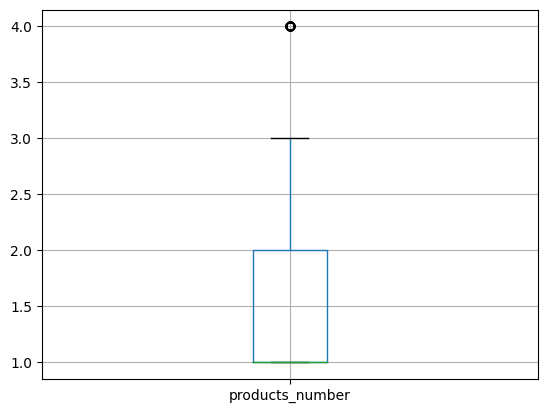

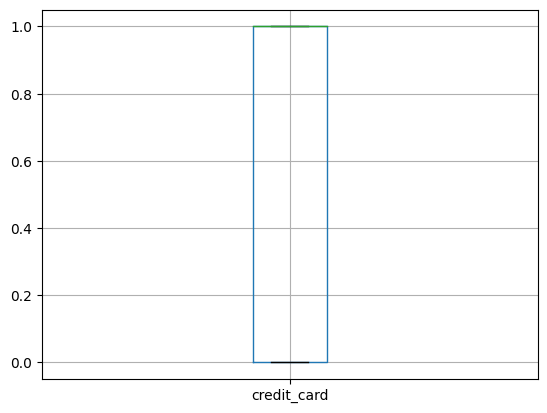

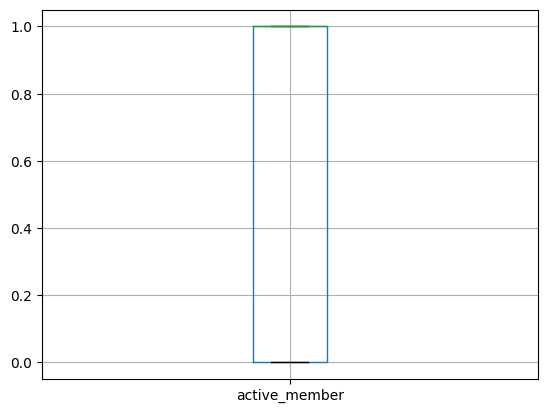

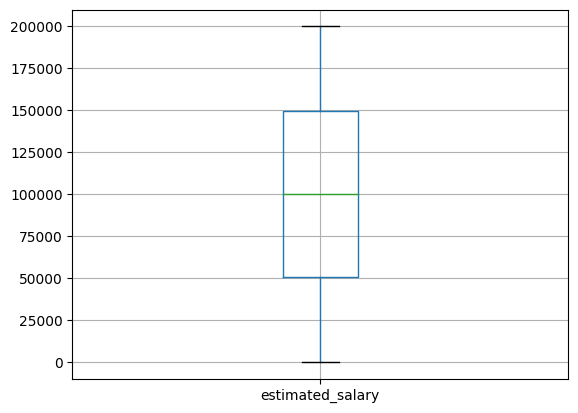

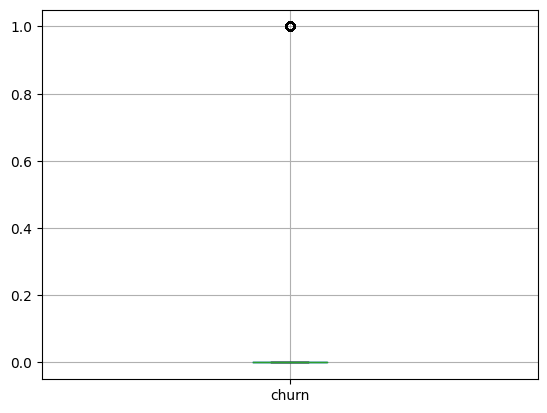

In [ ]:
num_dataset = dataset.drop(columns=['country', 'gender'])
num_dataset

for column in num_dataset:
    plt.figure()
    num_dataset.boxplot([column])

Tahap yang sama dengan sebelumnya, yaitu untuk melakukan analisis & memvisualisasikan persebaran data pada setiap kolom. Hanya saja menggunakan visualisasi yang berbeda

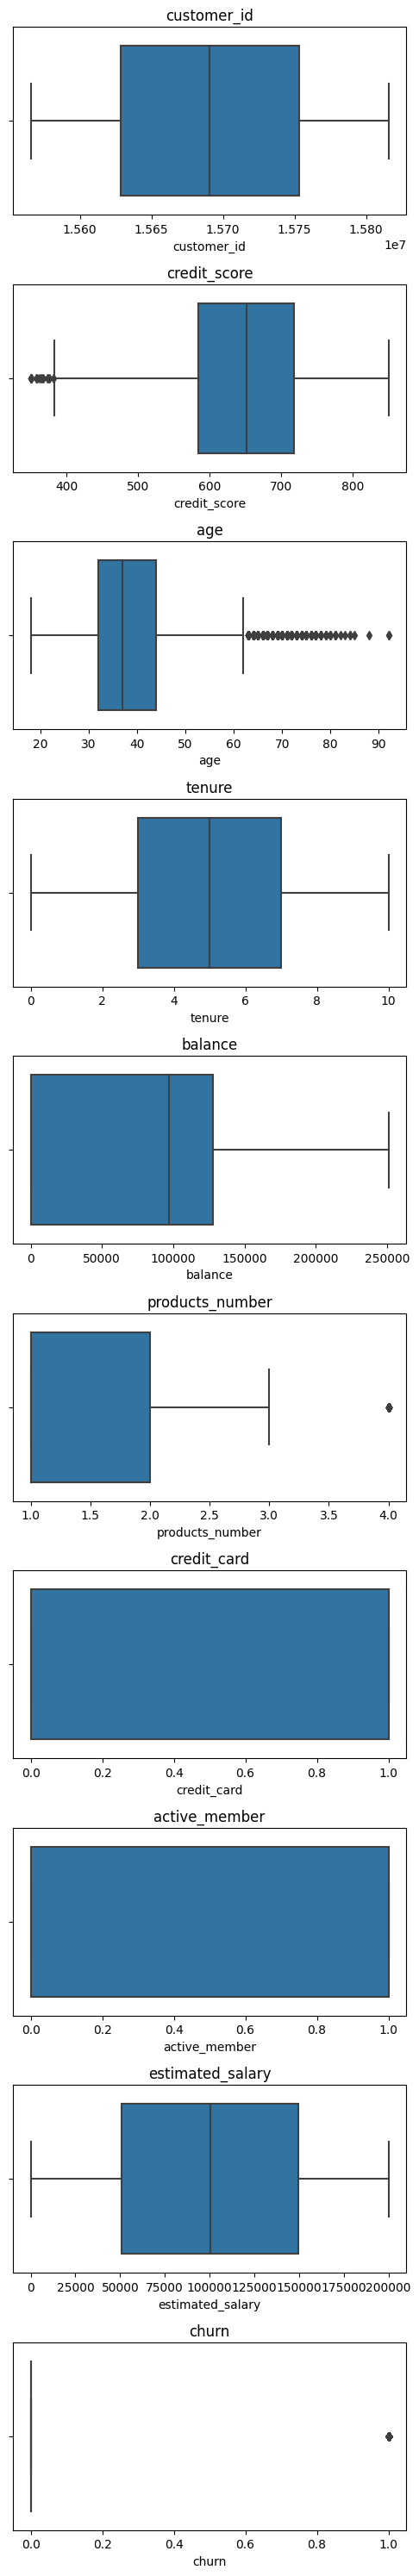

In [ ]:
fig, axs = plt.subplots(10, figsize = (5,30))

plt1 = sns.boxplot(x=num_dataset['customer_id'], ax = axs[0]).set(title='customer_id')
plt2 = sns.boxplot(x=num_dataset['credit_score'], ax = axs[1]).set(title='credit_score')
plt3 = sns.boxplot(x=num_dataset['age'], ax = axs[2]).set(title='age')
plt4 = sns.boxplot(x=num_dataset['tenure'], ax = axs[3]).set(title='tenure')
plt5 = sns.boxplot(x=num_dataset['balance'], ax = axs[4]).set(title='balance')
plt6 = sns.boxplot(x=num_dataset['products_number'], ax = axs[5]).set(title='products_number')
plt7 = sns.boxplot(x=num_dataset['credit_card'], ax = axs[6]).set(title='credit_card')
plt8 = sns.boxplot(x=num_dataset['active_member'], ax = axs[7]).set(title='active_member')
plt9 = sns.boxplot(x=num_dataset['estimated_salary'], ax = axs[8]).set(title='estimated_salary')
plt10 = sns.boxplot(x=num_dataset['churn'], ax = axs[9]).set(title='churn')

plt.tight_layout()

######Check Outlier With Z-Score

Tahap untuk melakukan analisis & meggambarkan persebaran data pada setiap kolom menggunakan metode Z-Score

In [ ]:
#Check with z-score
import scipy.stats as stats
stats.zscore(num_dataset)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...,...
9995,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


###Drop Outliers
Tahap untuk menangani outlier pada dataset. Disini digunakan metode Inter Quartile Range (IQR)

Tahap untuk menangani outlier pada dataset. Disini digunakan metode Inter Quartile Range (IQR). Didapatkan data hasil drop yaitu 7677 baris dan 12 kolom

In [ ]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR=Q3-Q1
dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
dataset.shape

<ipython-input-54-2ae10133999e>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset.quantile(0.25)
<ipython-input-54-2ae10133999e>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset.quantile(0.75)
<ipython-input-54-2ae10133999e>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]


(7677, 12)

###Univariate Analysis
Pada tahap ini merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah untuk 1 jenis variabel / kolom

Pada tahap baris kode ini ditujukan untuk membagi kolom numerik dan kategorikal ke dalam masing-masing variabel

In [ ]:
numerical_features = ['customer_id', 'credit_score', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn']
categorical_features = ['country', 'gender']

######Categorical Features

Pada tahap baris kode ini ditujukan mendeskripsikan jumlah sampel dan persentase kolom kategorik dari `Country`

         jumlah sampel  persentase
France            4049        52.7
Spain             1988        25.9
Germany           1640        21.4


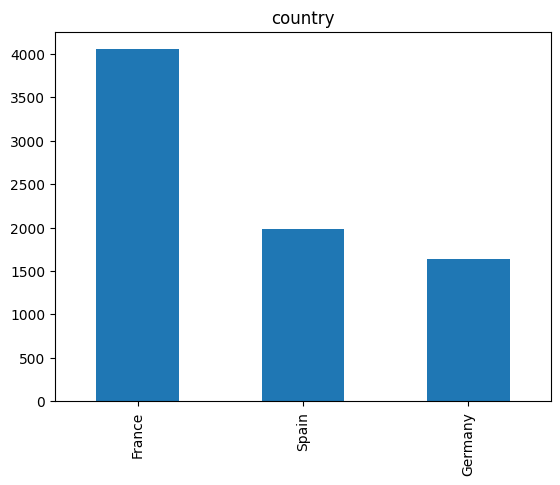

In [ ]:
#feature country
feature = categorical_features[0]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Pada tahap baris kode ini ditujukan mendeskripsikan jumlah sampel dan persentase kolom kategorik dari `Gender`

        jumlah sampel  persentase
Male             4399        57.3
Female           3278        42.7


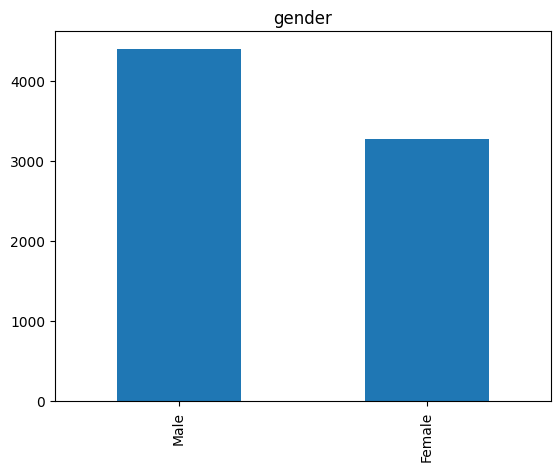

In [ ]:
#feature gender
feature = categorical_features[1]
count = dataset[feature].value_counts()
percent = 100*dataset[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

######Numerical Features

Pada tahap baris kode ini ditujukan visualisai persebaran dari kolom`'customer_id', 'credit_score', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'`

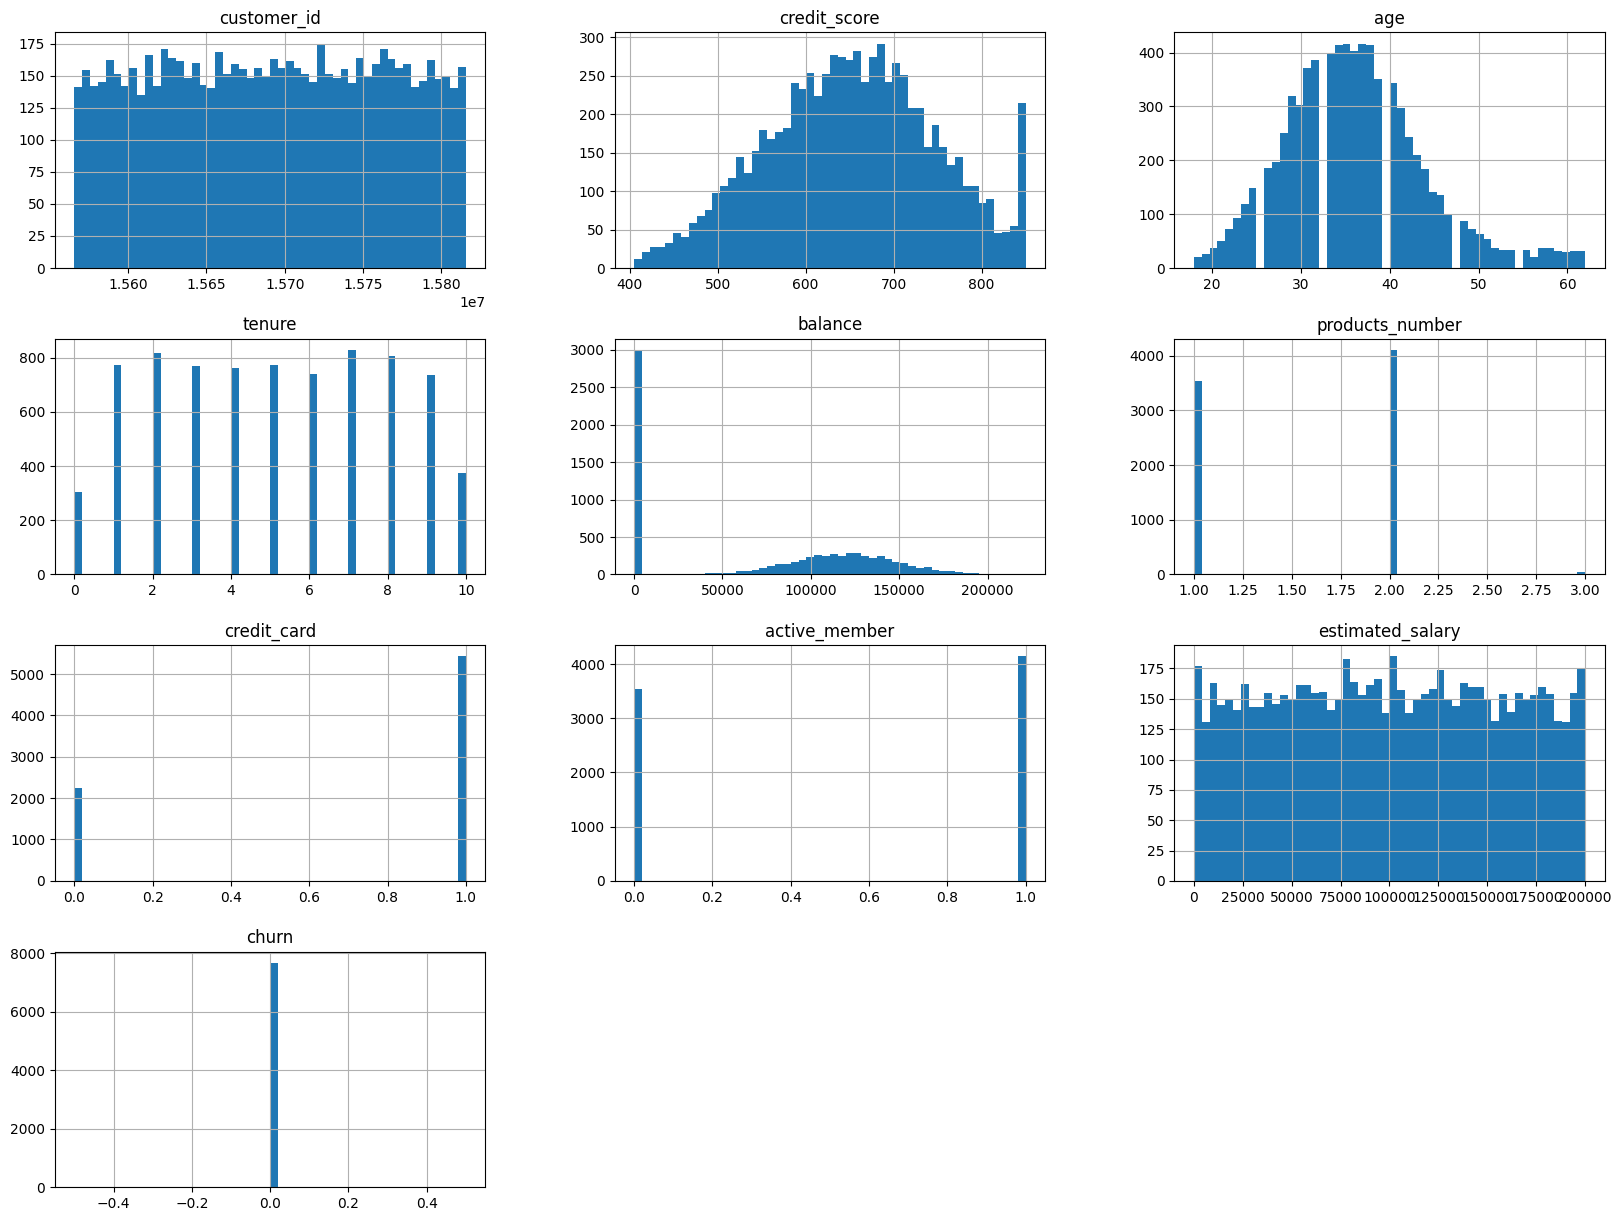

In [ ]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

###Multivariate Analysis
Pada tahap ini merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah untuk 2 atau lebih jenis variabel / kolom

######Categorical Features

Visualisasi untuk rata-rata kolom `balance` terhadap kolom kategorik `country` dan `gender`

['country', 'gender']

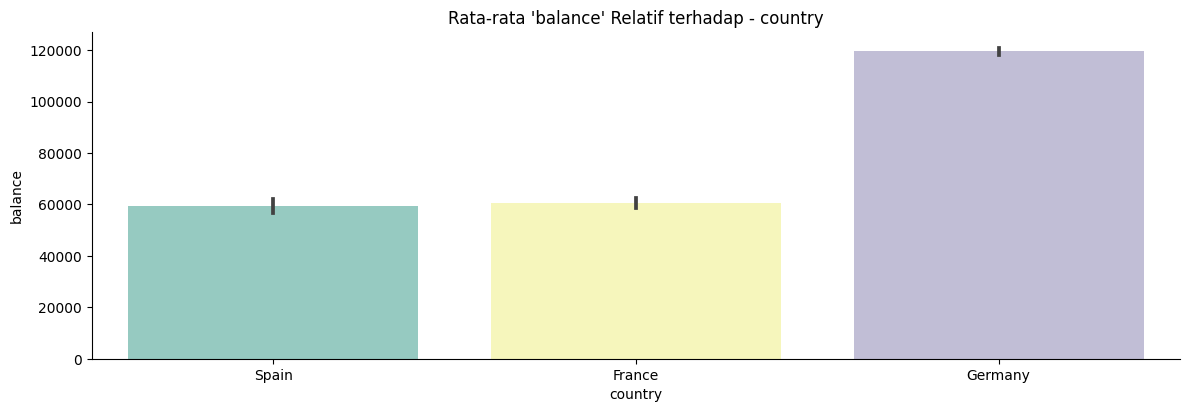

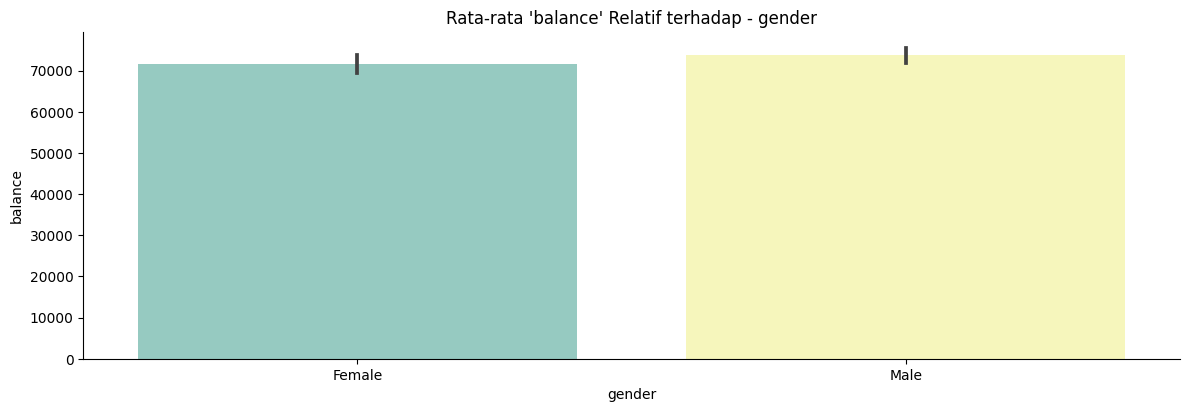

In [ ]:
cat_features = dataset.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="balance", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Rata-rata 'balance' Relatif terhadap - {}".format(col))

cat_features

Visualisasi untuk rata-rata kolom `estimated_salary` terhadap kolom kategorik `country` dan `gender`

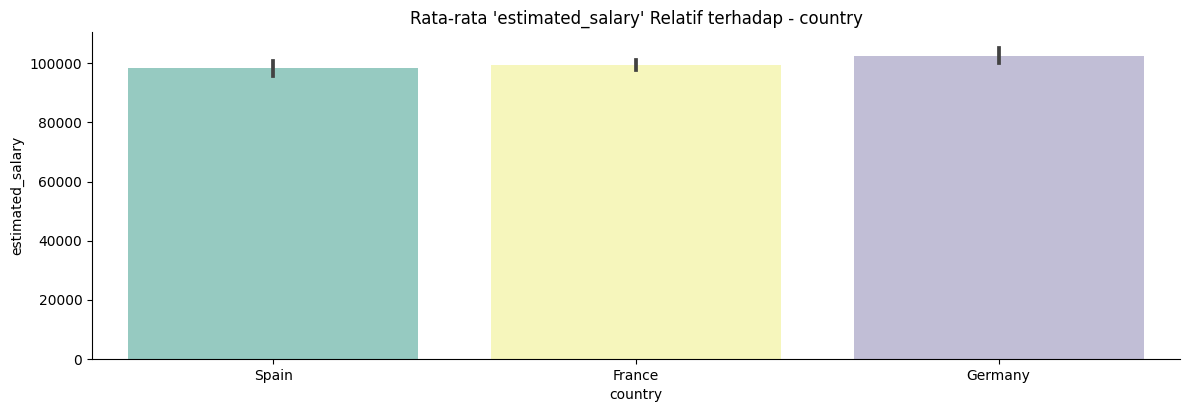

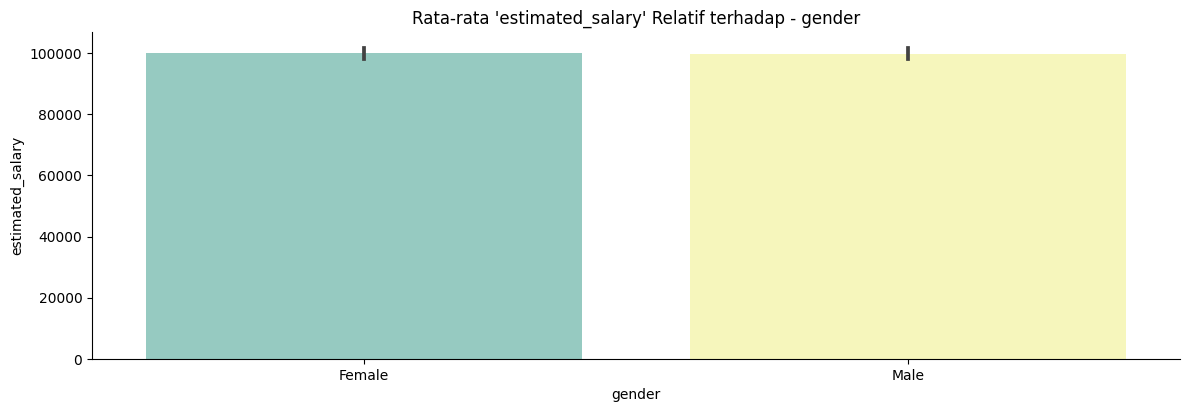

In [ ]:
cat_features = dataset.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="estimated_salary", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Rata-rata 'estimated_salary' Relatif terhadap - {}".format(col))

Visualisasi untuk rata-rata kolom `credit_score` terhadap kolom kategorik `country` dan `gender`

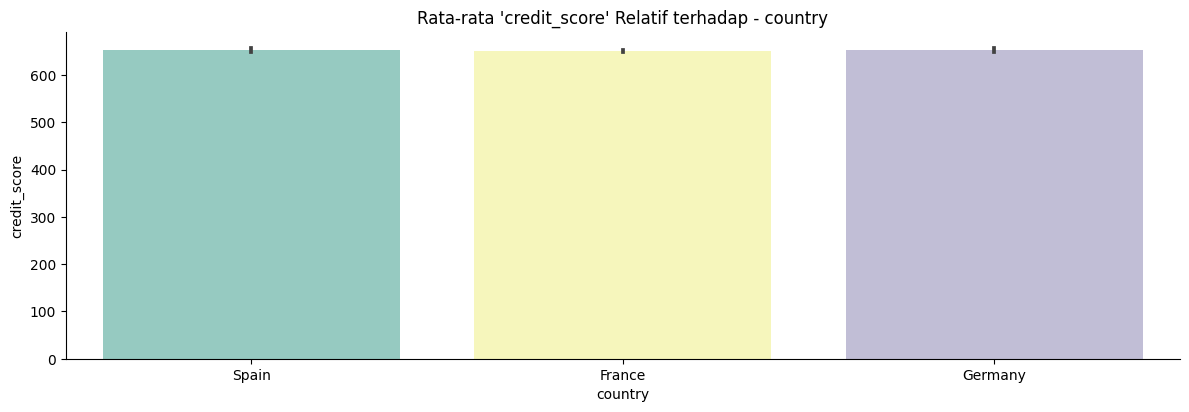

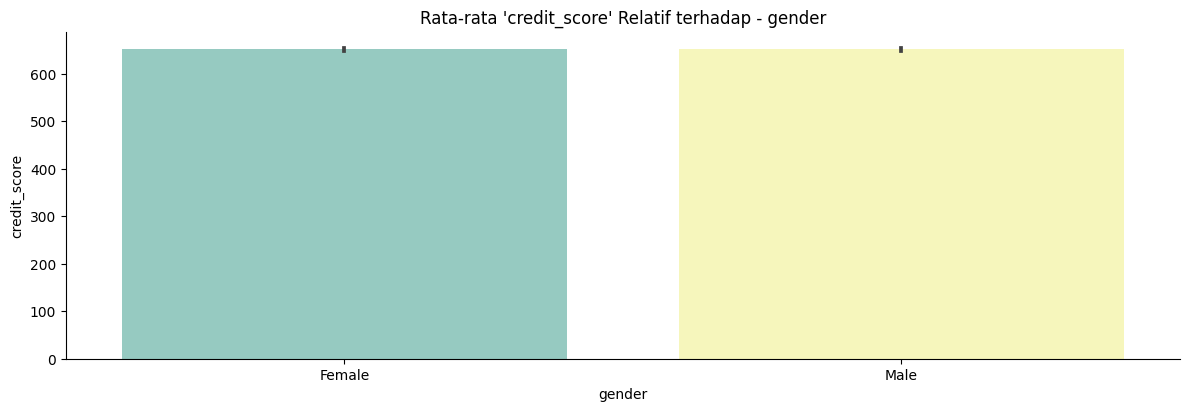

In [ ]:
cat_features = dataset.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="credit_score", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Rata-rata 'credit_score' Relatif terhadap - {}".format(col))

Visualisasi untuk rata-rata kolom `age` terhadap kolom kategorik `country` dan `gender`

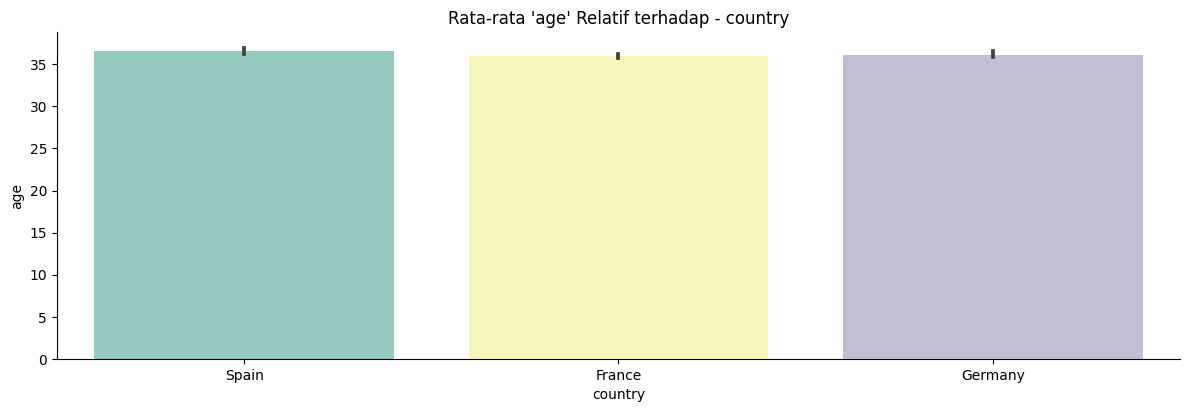

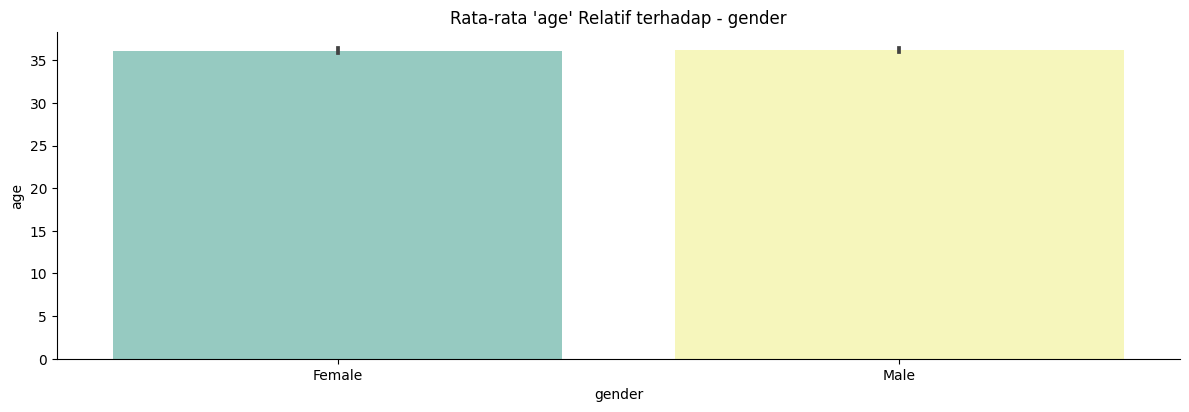

In [ ]:
cat_features = dataset.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="age", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataset, palette="Set3")
  plt.title("Rata-rata 'age' Relatif terhadap - {}".format(col))

######Numerical Features

Visualisasi keterkaitan data untuk setiap kolom numerik dengan kolom numerik lainnya. Disini juga untuk melihat korelasi dengan kolom target

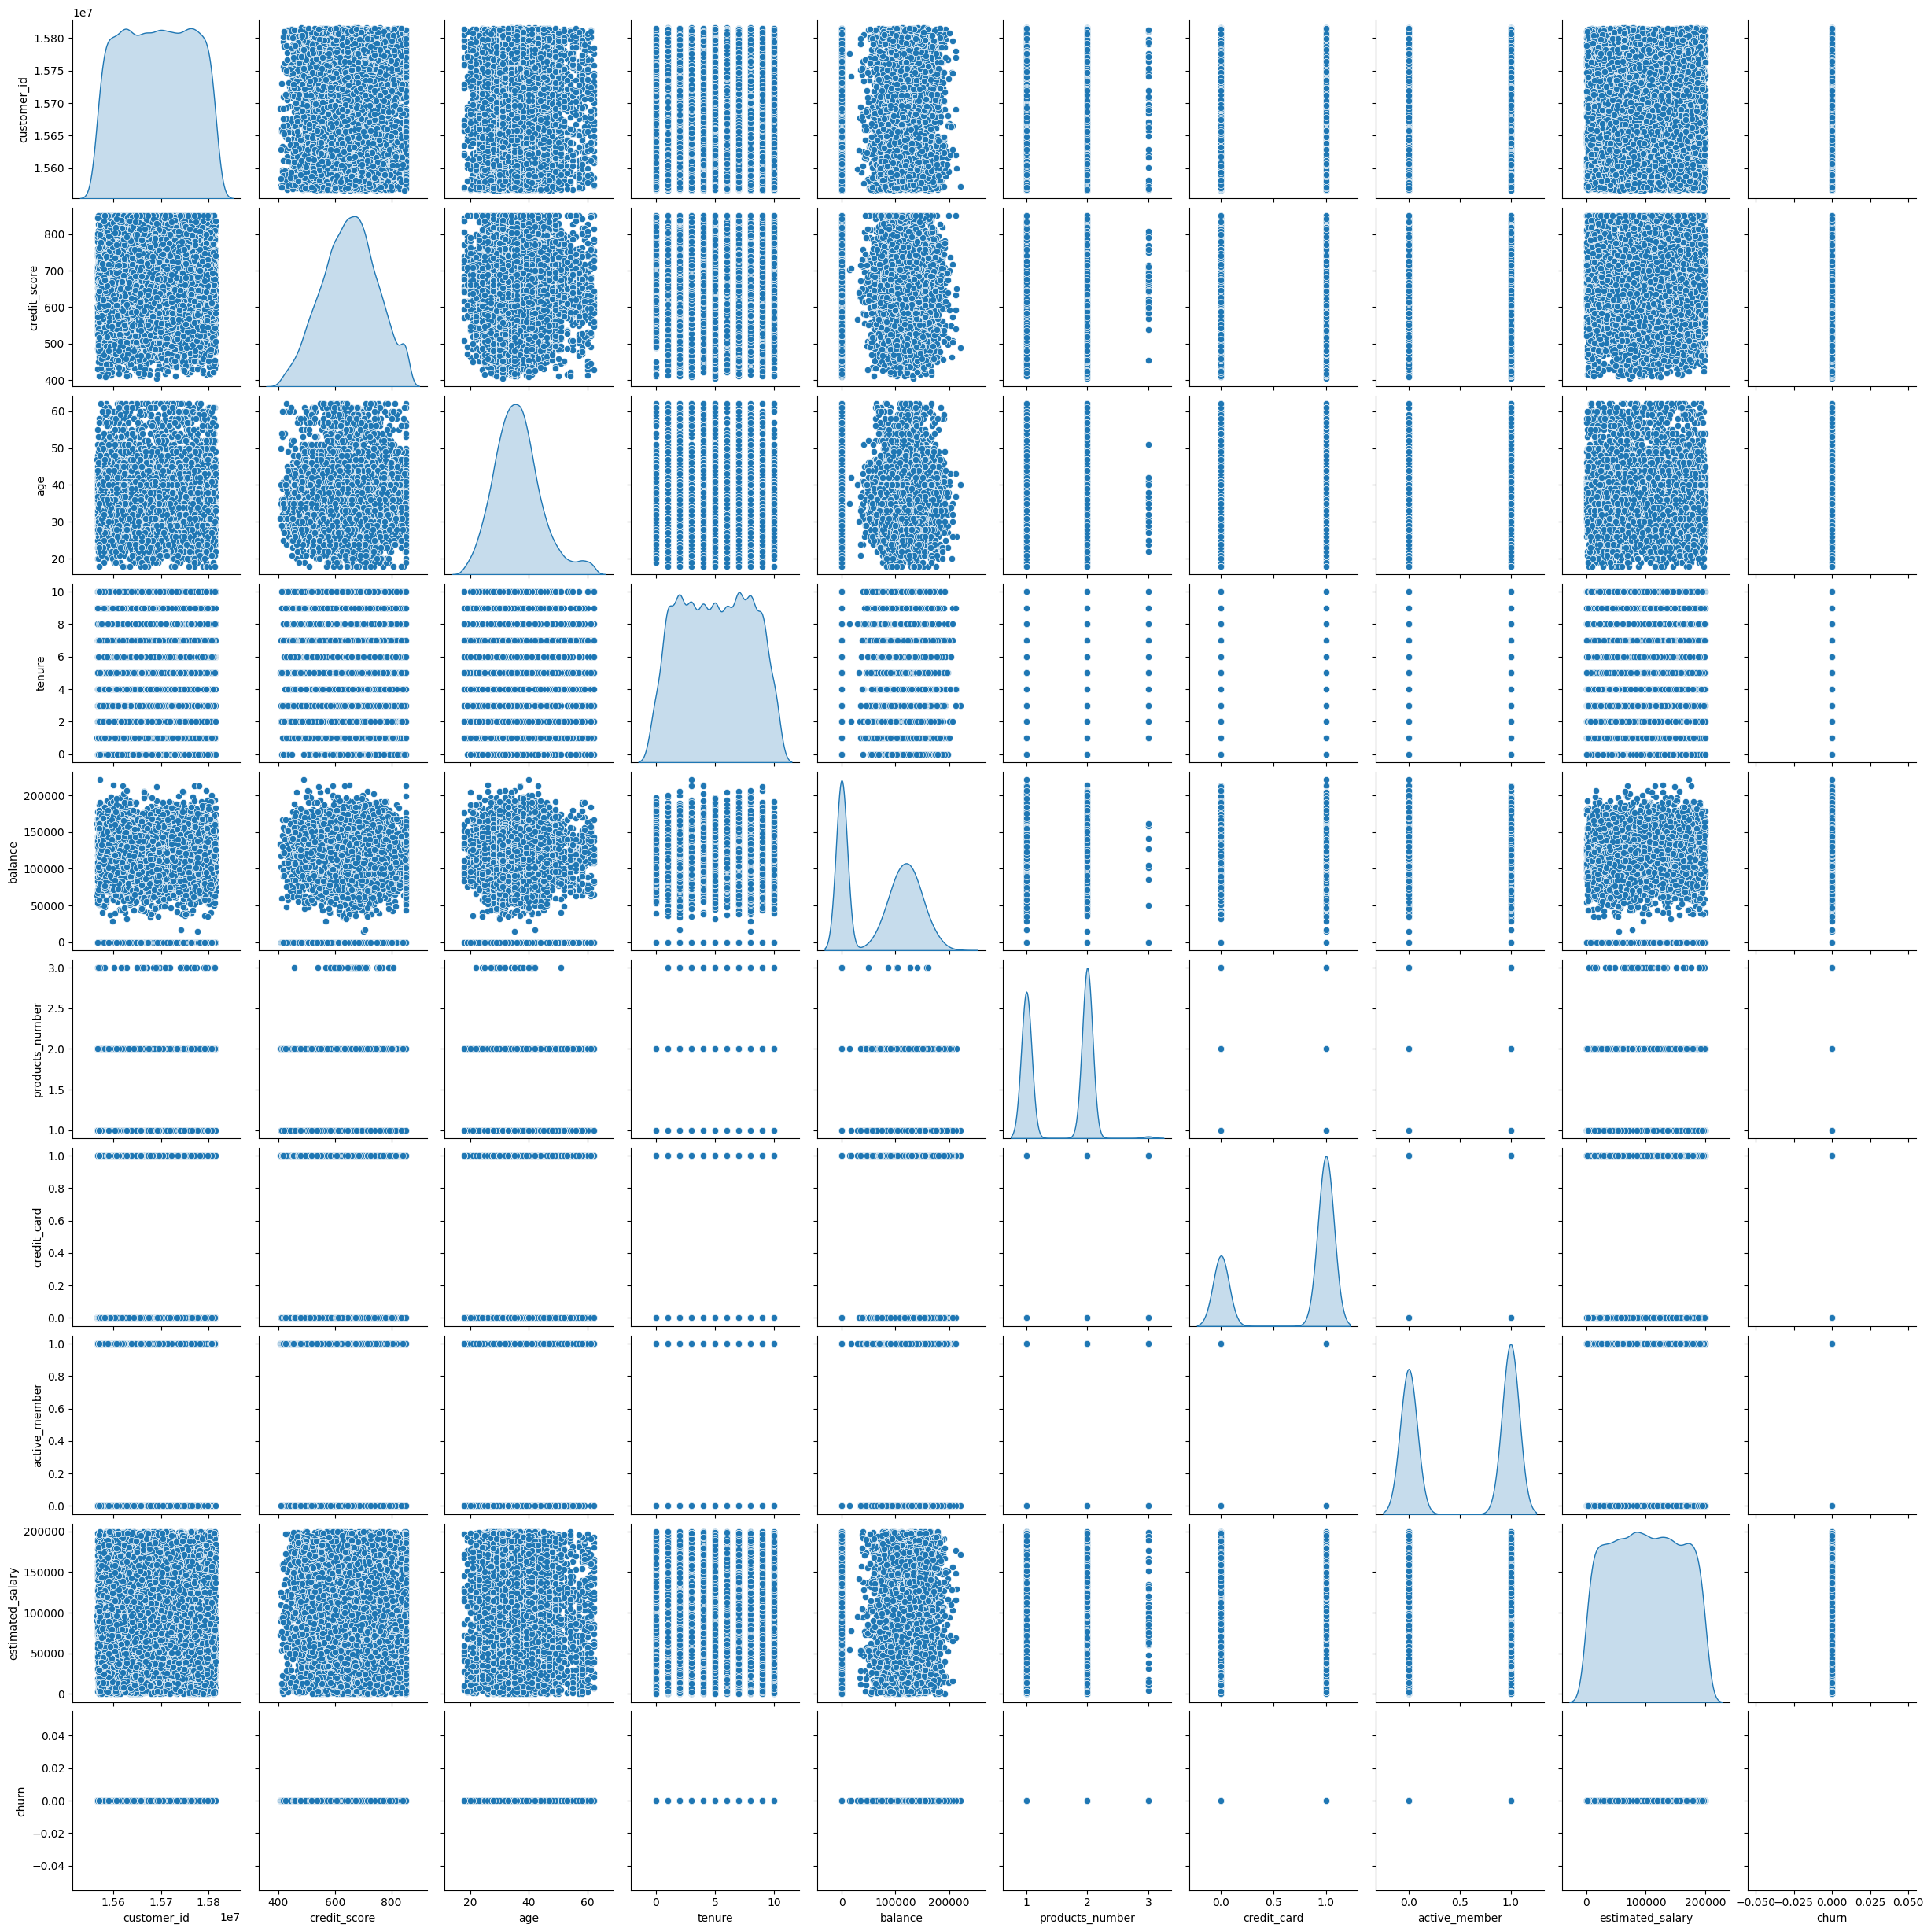

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(dataset, diag_kind = 'kde')

Visualisasi matriks korelasi data untuk setiap kolom numerik dengan kolom numerik lainnya

<ipython-input-64-21ff13a2d038>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

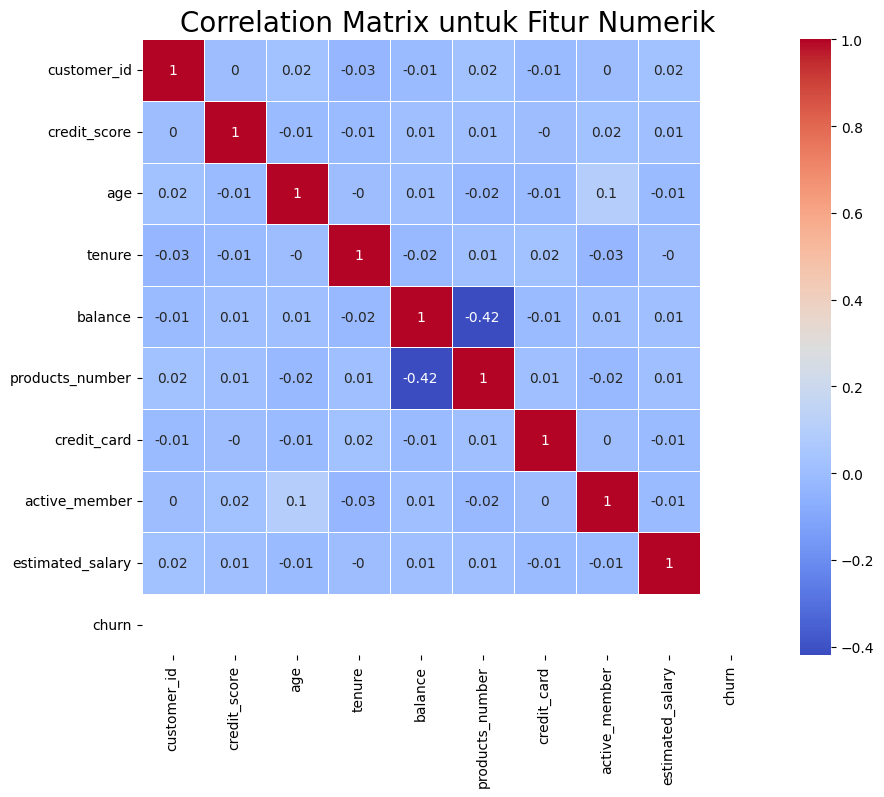

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

###Drop Column
Tahap untuk melakukan penghilangan kolom yang tidak diperlukan sesuai analisis masalah dan tujuan penelitian

In [ ]:
#tidak perlu customer id di sini
dataset.drop(['customer_id'], inplace=True, axis=1)
dataset.head()

<ipython-input-65-fa219ccd60e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['customer_id'], inplace=True, axis=1)


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


### Encoding Categorical Features
Tahap untuk memberikan alias dalam bentuk numerik kepada kolom yang bersifat kategorikal

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
dataset = pd.concat([dataset, pd.get_dummies(dataset['country'], prefix='country')],axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['gender'], prefix='gender')],axis=1)
dataset.drop(['country','gender'], axis=1, inplace=True)
# dataset.head()
dataset

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,644,28,7,155060.41,1,1,0,29179.52,0,1,0,0,0,1
9994,800,29,2,0.00,2,0,0,167773.55,0,1,0,0,1,0
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1


###PCA Reduction
Tahap untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n

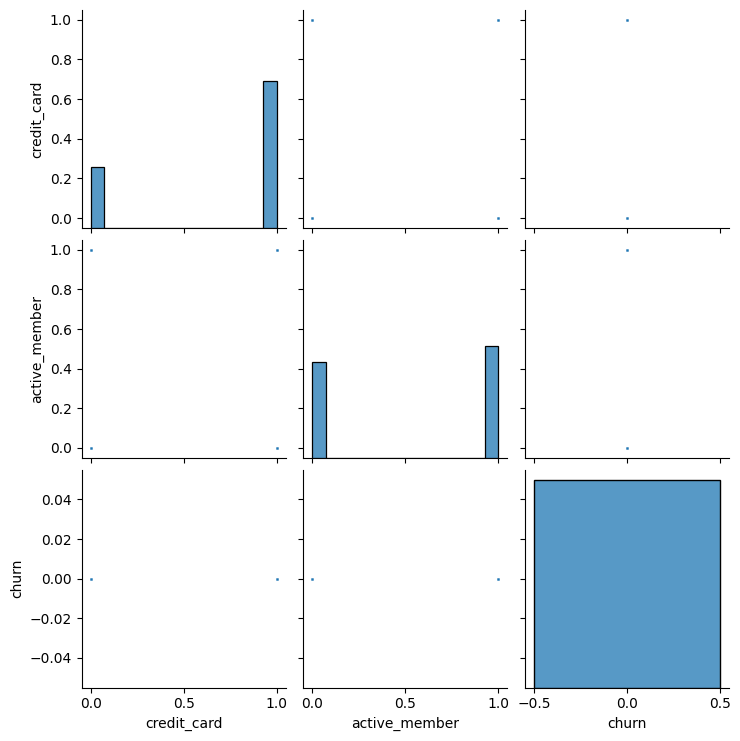

In [ ]:
sns.pairplot(dataset[['credit_card','active_member','churn']], plot_kws={"s": 3});
# # buat column churn
# sns.pairplot(dataset[['credit_card','active_member']], plot_kws={"s": 3});

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(dataset[['credit_card','active_member','churn']])
princ_comp = pca.transform(dataset[['credit_card','active_member','churn']])

# #buat column churn
# pca = PCA(n_components=2, random_state=123)
# pca.fit(dataset[['credit_card','active_member']])
# princ_comp = pca.transform(dataset[['credit_card','active_member']])

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.545, 0.455, 0.   ])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)

pca.fit(dataset[['credit_card','active_member','churn']])
dataset['reduction_column'] = pca.transform(dataset.loc[:, ('credit_card','active_member','churn')]).flatten()
dataset.drop(['credit_card','active_member','churn'], axis=1, inplace=True)

##buat column churn
# pca.fit(dataset[['credit_card','active_member']])
# dataset['dimension'] = pca.transform(dataset.loc[:, ('credit_card','active_member')]).flatten()
# dataset.drop(['credit_card','active_member'], axis=1, inplace=True)

In [ ]:
dataset

,credit_score,age,tenure,balance,products_number,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male,reduction_column
1,608,41,1,83807.86,1,112542.58,0,0,1,1,0,-0.455315
3,699,39,1,0.00,2,93826.63,1,0,0,1,0,0.544660
4,850,43,2,125510.82,1,79084.10,0,0,1,1,0,-0.462401
6,822,50,7,0.00,2,10062.80,1,0,0,0,1,-0.462401
8,501,44,4,142051.07,2,74940.50,1,0,0,0,1,-0.455315
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,644,28,7,155060.41,1,29179.52,1,0,0,0,1,0.537573
9994,800,29,2,0.00,2,167773.55,1,0,0,1,0,0.544660
9995,771,39,5,0.00,2,96270.64,1,0,0,0,1,0.537573
9996,516,35,10,57369.61,1,101699.77,1,0,0,0,1,-0.462401


###Train Test Split
Tahap untuk membagi dataset menjadi data train dan data test dalam pembagian yang ditentukan

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop(["estimated_salary"],axis =1)
y = dataset["estimated_salary"]

##buat column churn
# X = dataset.drop(["churn"],axis =1)
# y = dataset["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
X_train

,credit_score,age,tenure,balance,products_number,country_France,country_Germany,country_Spain,gender_Female,gender_Male,reduction_column
4250,489,38,5,117289.92,1,1,0,0,1,0,0.544660
6527,464,38,3,116439.65,1,1,0,0,0,1,0.537573
9773,532,36,4,0.00,2,1,0,0,0,1,-0.462401
9098,473,32,5,146602.25,2,0,1,0,1,0,-0.462401
9878,728,43,8,128412.61,1,0,0,1,1,0,-0.455315
...,...,...,...,...,...,...,...,...,...,...,...
5333,717,33,1,99106.73,1,0,0,1,0,1,0.544660
1754,724,33,5,103564.83,2,0,1,0,0,1,0.537573
4546,662,37,5,0.00,2,1,0,0,1,0,0.537573
9822,808,39,3,124216.93,1,0,1,0,0,1,-0.455315


In [ ]:
y_train

4250     85231.88
6527     75574.48
9773    132798.78
9098     72946.95
9878    139024.31
          ...    
5333    194467.23
1754    121085.72
4546    151871.84
9822    171442.36
4708     55893.37
Name: estimated_salary, Length: 6909, dtype: float64

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 7677
Total # of sample in train dataset: 6909
Total # of sample in test dataset: 768


###Standarisasi
Tahap untuk melakukan perubahan skala nilai pada kolom `balance` sesuai skala yang diinginkan

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['balance']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,balance
4250,0.715413
6527,0.701878
9773,-1.151577
9098,1.181998
9878,0.892461


#Modelling
Tahap ini merupakan proses untuk memodelkan data menggunakan algoritma yang disesuaikan dengan analisis masalah penelitian.
Pada tahap ini menggunakan algoritma regression
- KNN
- Random Forest
- Boosting Algorithm

###Using KNN

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = y_pred_knn, y_true=y_train)

###Using Random Forest

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

y_pred_rf = RF.predict(X_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=y_pred_rf, y_true=y_train)

###Using Boosting Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)

y_pred_b = boosting.predict(X_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=y_pred_b, y_true=y_train)


#Evaluation
Tahap ini merupakan proses melihat dan menguji kualitas model yang telah dibuat menggunakan data train dan data test

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,2968172.305253,3465792.442485
RF,1761707.995187,3191459.320204
Boosting,3295166.827903,3151822.279631


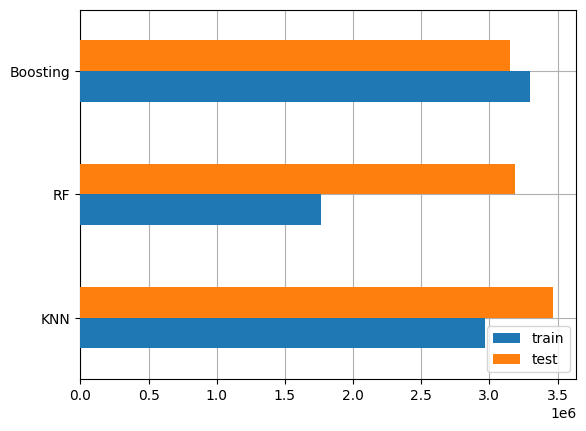

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
    # pred_dict['prediksi_'+name] = model.predict(prediksi)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
2047,47432.43,125212.7,100126.9,98495.8
